In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from scipy.stats import pearsonr

In [2]:
df = pd.read_csv('/home/shraddha/Downloads/Data04022020/data04022020.txt', sep='\t',
                 names=('cdt','zipcode','normalize15','received_energy_kwh','capacity'),low_memory=False)
df = pd.DataFrame(df)

# df['cdt']= df['cdt'].apply(lambda x : datetime.datetime.strptime(x,'YYYY-MM-DD HH:MM:SS'))
print(df.head())

                   cdt  zipcode  normalize15  received_energy_kwh  capacity
0  2017-01-01 07:30:00    75019       0.0006                0.000       NaN
1  2017-01-01 07:30:00    75075       0.0126                1.054     15.20
2  2017-01-01 07:30:00    75093       0.0251                0.291     10.00
3  2017-01-01 07:30:00    76060       0.0047                0.000       NaN
4  2017-01-01 07:30:00    76063       0.0027                0.777     37.96


In [3]:
df = df.dropna()
# df = df[df['zipcode']==75075]
print(df.head(10))

                    cdt  zipcode  normalize15  received_energy_kwh  capacity
1   2017-01-01 07:30:00    75075       0.0126                1.054     15.20
2   2017-01-01 07:30:00    75093       0.0251                0.291     10.00
4   2017-01-01 07:30:00    76063       0.0027                0.777     37.96
5   2017-01-01 07:30:00    76087       0.0033                0.000      6.92
6   2017-01-01 07:30:00    78664       0.0906                1.774     12.31
9   2017-01-01 07:45:00    75025       0.0018                1.703     21.40
10  2017-01-01 07:45:00    75075       0.0088                1.064     15.20
11  2017-01-01 07:45:00    75093       0.0174                0.296     10.00
13  2017-01-01 07:45:00    76063       0.0169                0.786     37.96
14  2017-01-01 07:45:00    76087       0.0041                0.000      6.92


In [4]:
df[['cdt','normalize15','zipcode' , 'received_energy_kwh','capacity']].notna().sum()

cdt                    326329
normalize15            326329
zipcode                326329
received_energy_kwh    326329
capacity               326329
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 326329 entries, 1 to 659172
Data columns (total 5 columns):
cdt                    326329 non-null object
zipcode                326329 non-null int64
normalize15            326329 non-null float64
received_energy_kwh    326329 non-null float64
capacity               326329 non-null float64
dtypes: float64(3), int64(1), object(1)
memory usage: 14.9+ MB


In [6]:
df['zipcode'].value_counts(())

76063    36752
76087    36713
75025    36701
78660    36687
78681    36660
78664    36598
75075    36568
75093    36541
78717    33109
Name: zipcode, dtype: int64

In [7]:
df.shape

(326329, 5)

In [8]:
df = df.drop(df.index[0])

In [9]:
# df = df[(df['cdt'] >= '2017-03-01 00:00') & (df['cdt']<= '2017-04-30 23:45') | (df['cdt']>= '2018-03-01 00:00') & 
#    (df['cdt'] <= '2018-04-30 23:45')]

df = df[(df['cdt'] >= '2017-03-01 00:00') & (df['cdt']<= '2017-03-31 23:45') | (df['cdt']>= '2018-03-01 00:00') & 
   (df['cdt'] <= '2018-03-31 23:45')]



df  = pd.DataFrame(df)
print(df)


                        cdt  zipcode  normalize15  received_energy_kwh  \
45182   2017-03-01 07:00:00    75025       0.0014                5.984   
45183   2017-03-01 07:00:00    75075       0.0021                3.082   
45184   2017-03-01 07:00:00    75093       0.0237                0.686   
45186   2017-03-01 07:00:00    76063       0.0026                4.207   
45187   2017-03-01 07:00:00    76087       0.1248                0.000   
...                     ...      ...          ...                  ...   
389865  2018-03-31 19:45:00    76087       0.0078                0.000   
389871  2018-03-31 19:45:00    78660       0.0100                0.279   
389872  2018-03-31 19:45:00    78664       0.0096                0.252   
389873  2018-03-31 19:45:00    78681       0.0078                0.199   
389874  2018-03-31 19:45:00    78717       0.0084                0.347   

        capacity  
45182      21.40  
45183      15.20  
45184      10.00  
45186      37.96  
45187       6.92

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
X = pd.DataFrame(np.c_[df[['normalize15','zipcode','capacity']]],columns=['normalize15','zipcode','capacity'])
y = df['received_energy_kwh']


X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.7,random_state = 0)


print(X_train , X_test , y_train , y_test)



       normalize15  zipcode  capacity
18969       0.3981  76087.0      6.92
25236       0.0392  78717.0     10.00
9140        0.1392  78664.0     12.31
2104        0.6504  76063.0     37.96
16919       0.0027  78660.0     34.80
...            ...      ...       ...
13123       0.0203  78664.0     17.60
19648       0.3537  75093.0     17.20
9845        0.7638  75025.0     21.40
10799       0.1150  75075.0     15.20
2732        0.9517  75075.0     15.20

[7692 rows x 3 columns]        normalize15  zipcode  capacity
24975       0.8218  78717.0     10.00
17113       0.9379  75075.0     15.20
10778       0.4183  78681.0      9.50
4138        0.0428  78664.0     12.31
13507       0.0585  76063.0     60.16
...            ...      ...       ...
19954       0.0454  75093.0     17.20
7534        0.0060  75093.0     10.00
18727       0.3517  78660.0     34.80
24670       0.3306  75025.0     21.40
14361       0.0374  76063.0     60.16

[17950 rows x 3 columns] 376543      5.232
389064      0.374
6

In [29]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print(y_pred)

[ 31.9008   197.54095   44.72775  ... 143.0863    55.1779     2.704075]


In [34]:
print(y_pred)

from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

[ 31.9008   197.54095   44.72775  ... 143.0863    55.1779     2.704075]
Mean Absolute Error: 7.248251731669142
Mean Squared Error: 160.20357627179686
Root Mean Squared Error: 12.657155141333966


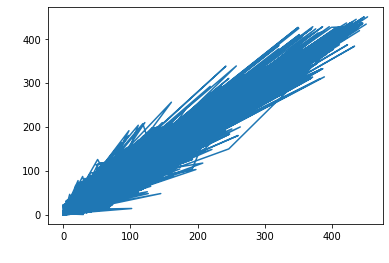

In [48]:
plt.plot(y_test , y_pred)
plt.xlabel('y_test', color ='w')
plt.ylabel('y_pred' , color= 'w')
plt.show()

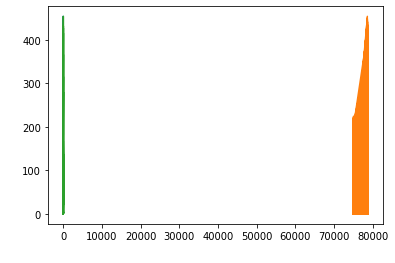

In [52]:
plt.plot(X_train  , y_train)
plt.xlabel('X_train', color ='w')
plt.ylabel('y_train' , color= 'w')
plt.show()